In [43]:
import random

def infectPeople(settings):
    people = [i for i in range(settings["population"])]
    random.shuffle(people)
    return people[0:settings["infectedAmount"]]

def makeParties(settings):
    return {i : i % settings["parties"] for i in range(settings["population"])}

def findPartiesInfected(peopleInfected, parties):
    partiesInfected = []
    for x in peopleInfected:
        partiesInfected.append(parties[x])
    return set(partiesInfected)


def simulate(settings):
    peopleInfected = infectPeople(settings)
    citizensToParty = makeParties(settings)
    partiesInfected = findPartiesInfected(peopleInfected, citizensToParty)
    citizensInfected =  len(partiesInfected) * settings["citizensPerParty"]
    return {
      "partiesInfected": len(partiesInfected),
      "citizensInfected": citizensInfected,
      "ratio": (1.0*citizensInfected) / settings["population"]
    }

def makeSettings(parties, population, infectedRate):
    return {
        "parties": parties,
        "population": population,
        "infectedRate": infectedRate,
        "infectedAmount": int(population * infectedRate),
        "citizensPerParty": int(population / parties)
    }


In [44]:
s = makeSettings(1000, 100000, 0.01)

In [45]:
simulate(s)

{'partiesInfected': 610, 'citizensInfected': 61000, 'ratio': 0.61}

In [46]:
N = 1000

def makeSimulation(settings, N):
    return [simulate(settings)["ratio"] for n in range(N)]


In [47]:
def get_divisors(n):
    for i in range(1, int(n / 2) + 1):
        if n % i == 0:
            yield i
    yield n
    
def mapField(population, infectedRate, N):
    divisors = [i for i in get_divisors(population)]
    print("Going to process " + str(len(divisors)))
    return {p: makeSimulation(makeSettings(p, population, infectedRate), N) for p in divisors}
    

Going to process 36


In [67]:
import matplotlib.pyplot as plt

def process(o):
    x = []
    y = []
    for parties, ratios in o.items():
        x.append(100000/parties)
        thisX = sum(ratios) / 100
        y.append(thisX)
    return (x, y)

def plotit(o):
    x, y = process(o)
    plt.figure()
    plt.subplot(111)
    plt.plot(x, y, 'o-')  
    plt.xscale('log')
    plt.title('% infected vs party size')
    plt.grid(True)


Going to process 36


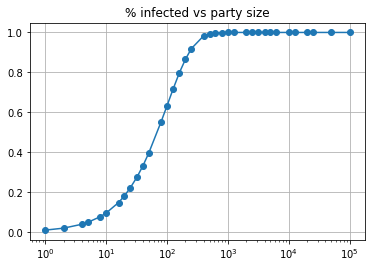

In [68]:
o = mapField(100000, 0.01, 100)
plotit(o)

Going to process 36


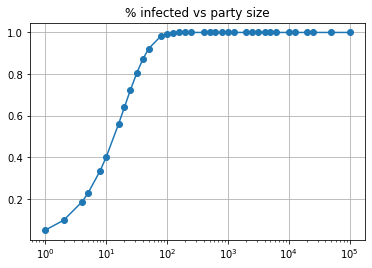

In [69]:
o = mapField(100000, 0.05, 100)
plotit(o)